In [84]:
import pandas as pd

In [85]:
# 크롤링할 url 주소 입력
url = 'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC'
url

'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC'

In [86]:
table = pd.read_html(url)
len(table)

33

In [89]:
df = table[4]
df.head()

,0,1,2,3,4,5,6,7,8
0,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률 (1000명당),조사망률 (1000명당),자연증가율 (1000명당),합계출산율
1,1925,12997611,558897,359042,199855,43.0,27.6,15.4,6.59
2,1926,13052741,511667,337948,173719,39.2,25.9,13.3,NaN
3,1927,13037169,534524,353818,180706,41.0,27.1,13.9,NaN
4,1928,13105131,566142,357701,208441,43.2,27.3,15.9,NaN


In [90]:
df2 = df.rename(columns=df.iloc[0])

In [91]:
df3 = df2.drop([0])

In [92]:
df3.shape

(97, 9)

In [93]:
df3.head()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률 (1000명당),조사망률 (1000명당),자연증가율 (1000명당),합계출산율
1,1925,12997611,558897,359042,199855,43.0,27.6,15.4,6.59
2,1926,13052741,511667,337948,173719,39.2,25.9,13.3,NaN
3,1927,13037169,534524,353818,180706,41.0,27.1,13.9,NaN
4,1928,13105131,566142,357701,208441,43.2,27.3,15.9,NaN
5,1929,13124279,566969,414366,152603,43.2,31.6,11.6,NaN


In [94]:
df3.tail()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률 (1000명당),조사망률 (1000명당),자연증가율 (1000명당),합계출산율
93,2017,51446201,357771,285534,72237,7.0,5.5,1.5,1.052
94,2018,51635256,326822,298820,28002,6.4,5.8,0.6,0.977
95,2019,51709098,303054,295132,7922,5.9,5.7,0.2,0.918
96,2020,51829023,272337,304948,-32611,5.3,5.9,-0.6,0.837
97,2021,51744876,260494,317773,-57280,5.1,6.2,-1.1,0.810


In [96]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 97
Data columns (total 9 columns):
연도 (년)            97 non-null object
추계인구(명)           97 non-null object
출생자수(명)           97 non-null object
사망자수(명)           97 non-null object
자연증가수(명)          97 non-null object
조출생률 (1000명당)     97 non-null object
조사망률 (1000명당)     97 non-null object
자연증가율 (1000명당)    97 non-null object
합계출산율             69 non-null object
dtypes: object(9)
memory usage: 7.6+ KB


In [137]:
df3['연도 (년)1'] = pd.to_datetime(df3['연도 (년)'])

In [152]:
df3['연도 (년)2'] = df3['연도 (년)1'].dt.strftime('%Y')

In [113]:
df3['추계인구(명)1'] = pd.to_numeric(df3['추계인구(명)'])

In [115]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 97
Data columns (total 11 columns):
연도 (년)            97 non-null object
추계인구(명)           97 non-null object
출생자수(명)           97 non-null object
사망자수(명)           97 non-null object
자연증가수(명)          97 non-null object
조출생률 (1000명당)     97 non-null object
조사망률 (1000명당)     97 non-null object
자연증가율 (1000명당)    97 non-null object
합계출산율             69 non-null object
추계인구(명)1          97 non-null int64
연도 (년)1           97 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 11.6+ KB


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
# - 기호 깨지는것 방지
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"

font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family=font_name)

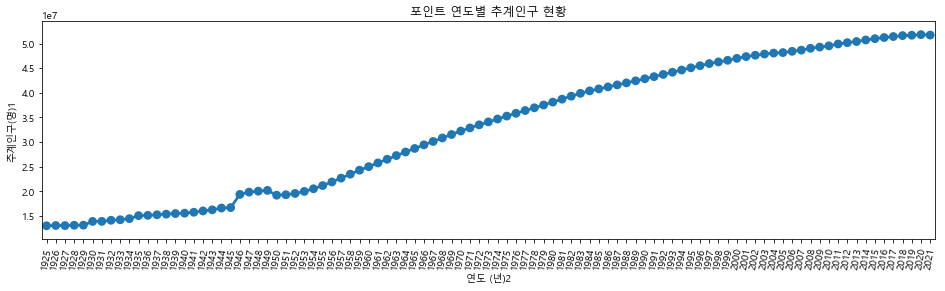

In [196]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
plt.title('포인트 연도별 추계인구 현황')
sns.pointplot(data=df3, x='연도 (년)2', y='추계인구(명)1')

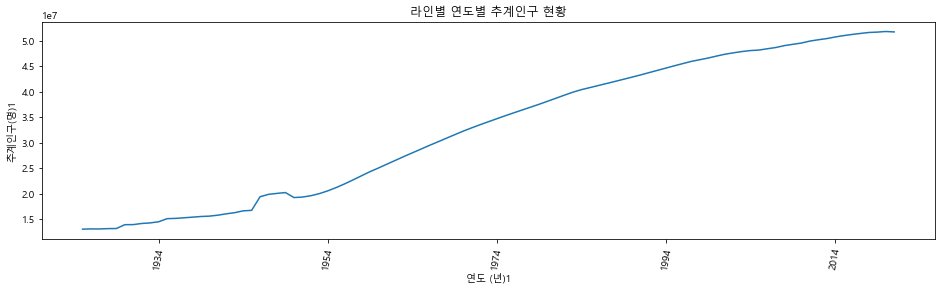

In [195]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
plt.title('라인별 연도별 추계인구 현황')
sns.lineplot(data=df3, x='연도 (년)1', y='추계인구(명)1')

In [146]:
df3['출생자수'] = pd.to_numeric(df3['출생자수(명)'])

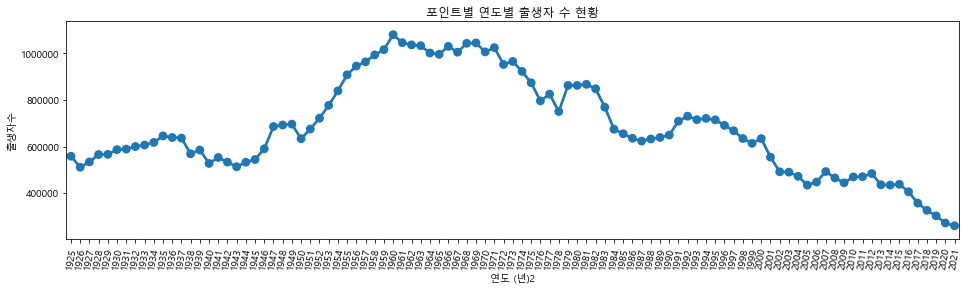

In [198]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
plt.title('포인트별 연도별 출생자 수 현황')
sns.pointplot(data= df3, x = '연도 (년)2', y = '출생자수')

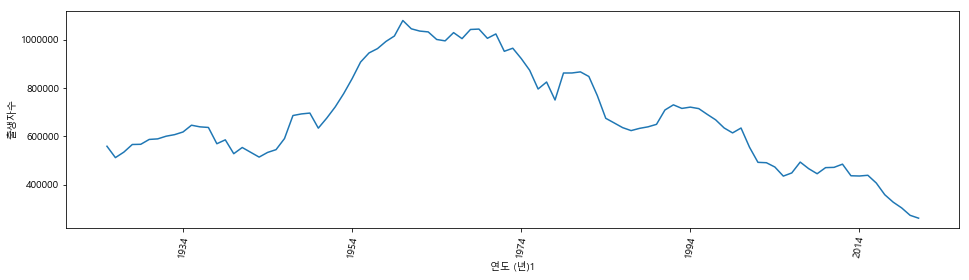

In [166]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
sns.lineplot(data= df3, x = '연도 (년)1', y = '출생자수')

In [161]:
df3['사망자 수'] = pd.to_numeric(df3['사망자수(명)'])

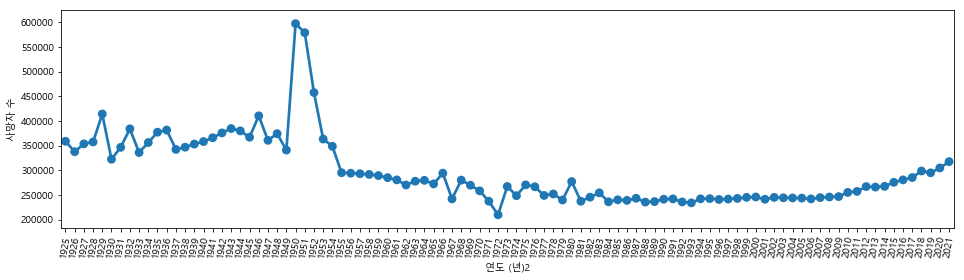

In [162]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
sns.pointplot(data = df3, x='연도 (년)2', y = '사망자 수')

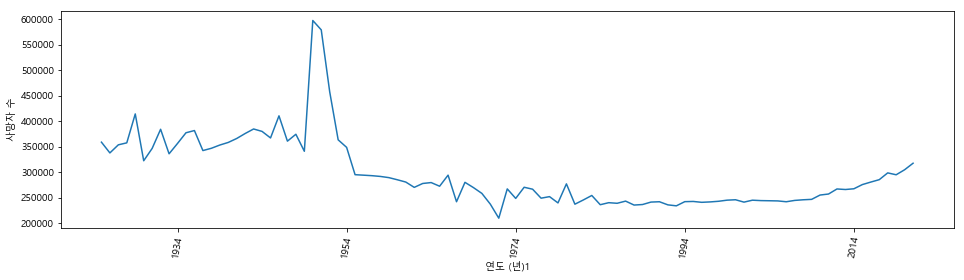

In [167]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
sns.lineplot(data = df3, x='연도 (년)1', y = '사망자 수')

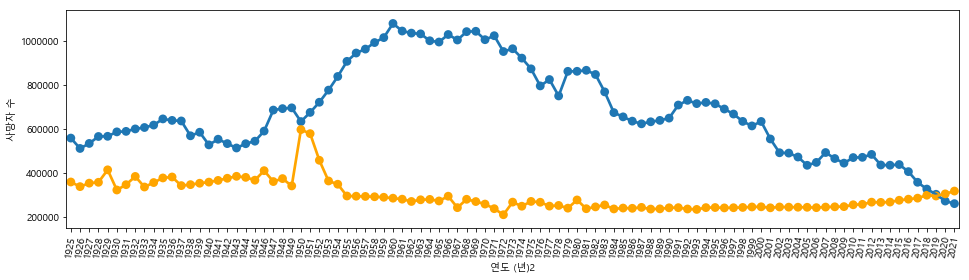

In [169]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
sns.pointplot(data = df3, x='연도 (년)2', y = '출생자수')
sns.pointplot(data = df3, x='연도 (년)2', y = '사망자 수', color='orange')

In [172]:
df3.columns

Index(['연도 (년)', '추계인구(명)', '출생자수(명)', '사망자수(명)', '자연증가수(명)', '조출생률 (1000명당)',
       '조사망률 (1000명당)', '자연증가율 (1000명당)', '합계출산율', '추계인구(명)1', '연도 (년)1',
       '연도 (년)2', '출생자수', '사망자 수'],
      dtype='object')

In [181]:
df_pop = df3[['연도 (년)1', '출생자수', '사망자 수']]
df_pop = df_pop.set_index('연도 (년)1')
df_pop.head()

,출생자수,사망자 수
연도 (년)1,,
1925-01-01,558897,359042
1926-01-01,511667,337948
1927-01-01,534524,353818
1928-01-01,566142,357701
1929-01-01,566969,414366


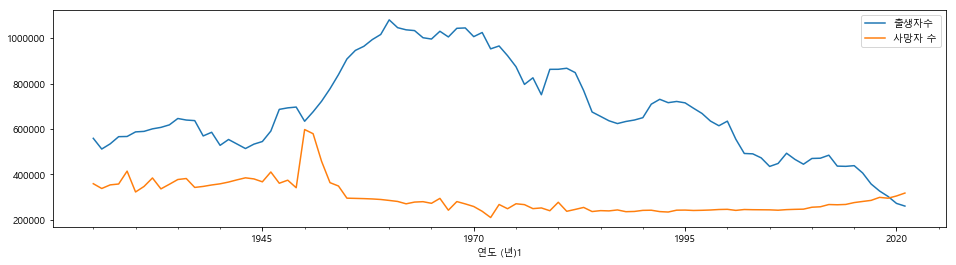

In [183]:
df_pop.plot(figsize = (16,4))

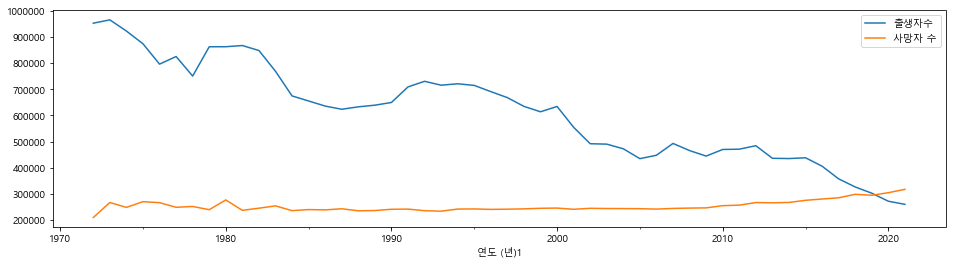

In [186]:
df_pop[-50:].plot(figsize = (16,4))

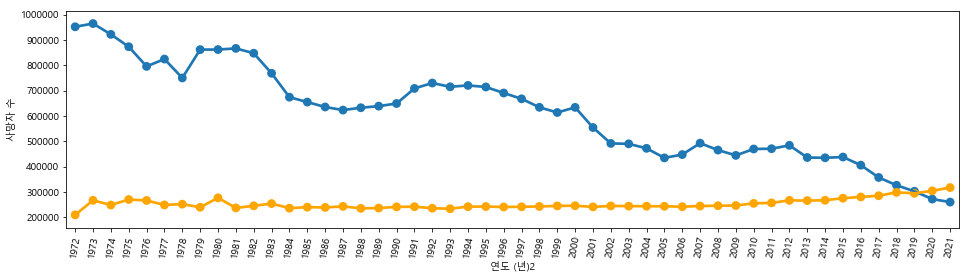

In [188]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
sns.pointplot(data = df3[-50:], x='연도 (년)2', y = '출생자수')
sns.pointplot(data = df3[-50:], x='연도 (년)2', y = '사망자 수', color='orange')

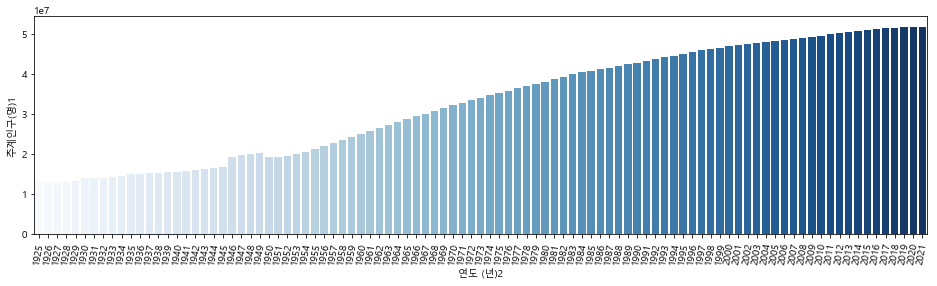

In [191]:
plt.figure(figsize = (16, 4))
plt.xticks(rotation = 80)
sns.barplot(data = df3 , x = '연도 (년)2', y = '추계인구(명)1',palette='Blues')

In [199]:
df3.head()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률 (1000명당),조사망률 (1000명당),자연증가율 (1000명당),합계출산율,추계인구(명)1,연도 (년)1,연도 (년)2,출생자수,사망자 수
1,1925,12997611,558897,359042,199855,43.0,27.6,15.4,6.59,12997611,1925-01-01,1925,558897,359042
2,1926,13052741,511667,337948,173719,39.2,25.9,13.3,NaN,13052741,1926-01-01,1926,511667,337948
3,1927,13037169,534524,353818,180706,41.0,27.1,13.9,NaN,13037169,1927-01-01,1927,534524,353818
4,1928,13105131,566142,357701,208441,43.2,27.3,15.9,NaN,13105131,1928-01-01,1928,566142,357701
5,1929,13124279,566969,414366,152603,43.2,31.6,11.6,NaN,13124279,1929-01-01,1929,566969,414366
